In [4]:
#Import libraries
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.neighbors import KNeighborsClassifier

# Mondel performance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics


#warnings
import warnings
warnings.simplefilter(action='ignore')

In [5]:
data_path = 'E:/Kuliah/SMT 4/KECERDASAN BUATAN/FInal Project/data.csv'
data = pd.read_csv(data_path)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
.head()

In [6]:
nRow, nCol = data.shape
print(f'Ada {nRow} baris dan {nCol} kolom')

Ada 569 baris dan 33 kolom


In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [10]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True) 

In [12]:
# categorical and numerical features
col = list(data.columns)
col.remove('diagnosis')
categorical_features = ['diagnosis']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : diagnosis
Numerical Features : radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst


In [13]:
data["diagnosis"].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
# 1 : M and 0 : B
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data['diagnosis'] 

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

diagnosis
0    357
1    212
Name: count, dtype: int64


<Axes: ylabel='count'>

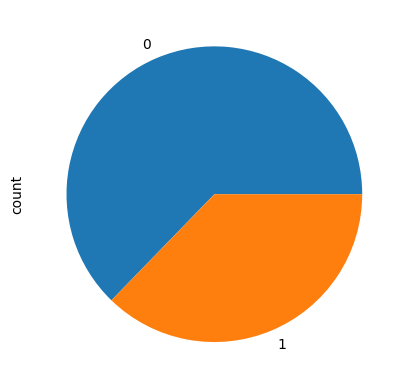

In [15]:
# Show number of malignant (M) and benign (B) values in diagnosis target feature
# Display as pie chart

print(data["diagnosis"].value_counts())

data["diagnosis"].value_counts().plot(kind="pie")

<Axes: >

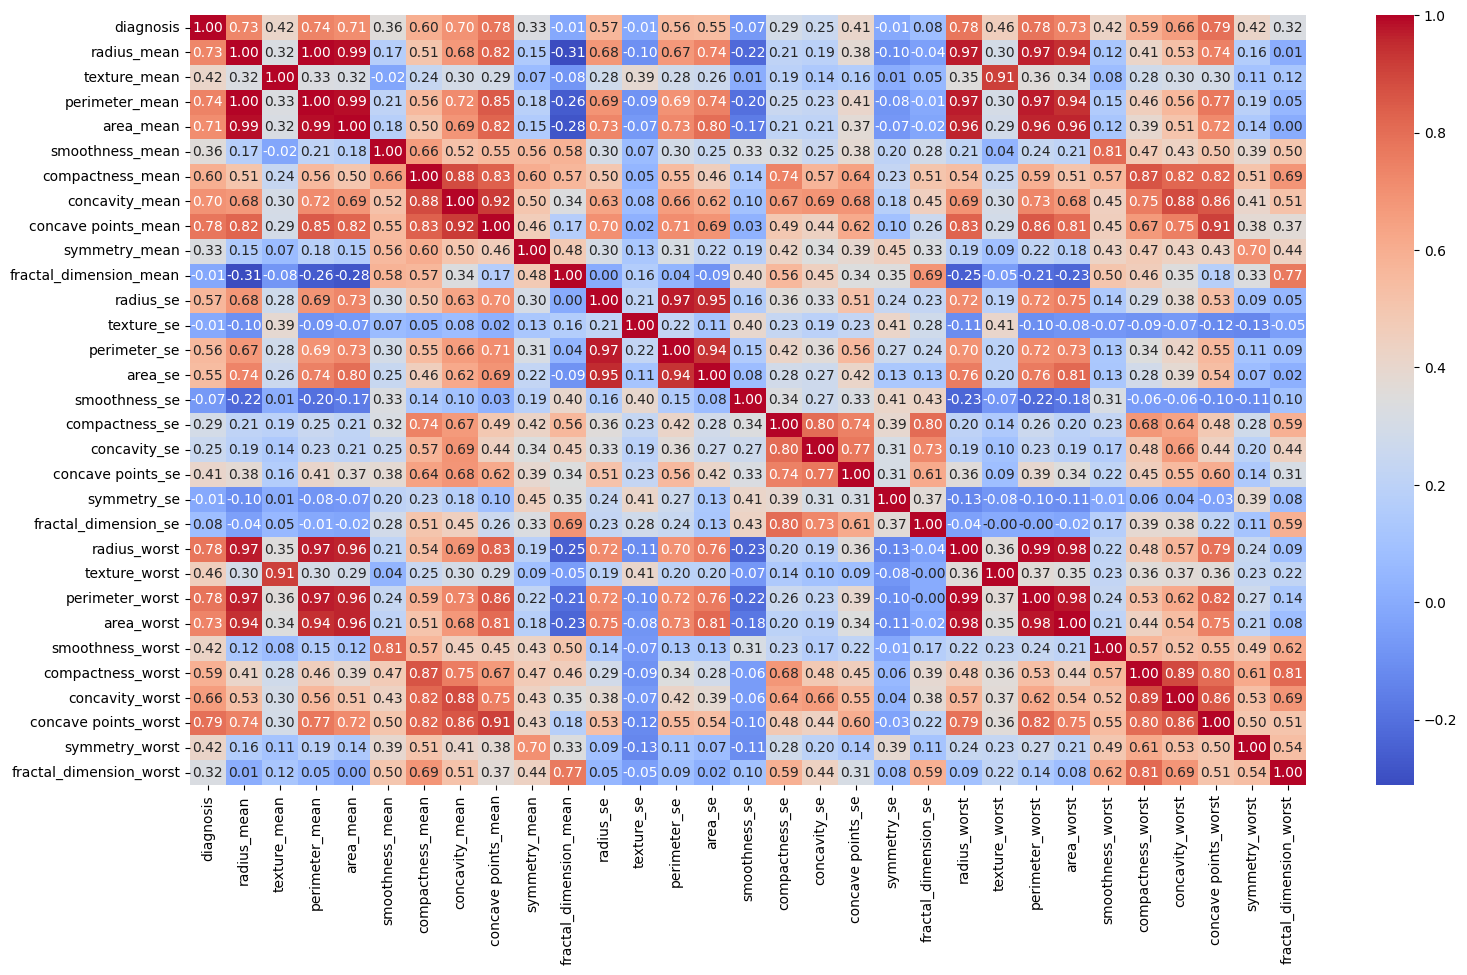

In [16]:
#Find the corelation between variables
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), cmap= 'coolwarm', annot= True, fmt='.2f')

In [17]:
#checking the correlation of ind. variable woth depn. variable
data.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [18]:
#KNN Model Bulding
#Independent variables
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis'].values.reshape(-1,1) #Target
print('Bentuk dari x : {} \nbentuk dari y : {}'.format(x.shape, y.shape))

Bentuk dari x : (569, 30) 
bentuk dari y : (569, 1)


In [19]:
# Returning the classification metrics for multi_class probelm.

def Report(y_test , y_pred):
    print('Accuracy : {}% \n'.format(accuracy_score(y_test , y_pred)*100))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(y_test , y_pred)))
    print('Classification Report : \n\n{}'.format(classification_report(y_test , y_pred)))
    
def multi_class_metrics(y_true, y_pred):
    print(f'Accuracy  : ', round(metrics.accuracy_score(y_true, y_pred), 3))
    print(f'Precision : ', round(metrics.precision_score(y_true, y_pred, average = 'micro'), 3))
    print(f'Recall    : ', round(metrics.recall_score(y_true, y_pred, average = 'micro'), 3))
    print(f'f1        : ', round(metrics.f1_score(y_true, y_pred, average = 'micro'), 3))  

In [20]:
#Membagi X dan Y untuk training dan tes di rasio 75:25
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)


In [21]:
k=20   #1 to 20
Acc=np.zeros((k))
for i in range (1, k+1):
    KNN= KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train.ravel())
    y_pred=KNN.predict (x_test)
    Acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    
Acc

array([0.91608392, 0.93706294, 0.92307692, 0.93706294, 0.93706294,
       0.95104895, 0.94405594, 0.95804196, 0.95804196, 0.95804196,
       0.95804196, 0.95804196, 0.95804196, 0.95804196, 0.95804196,
       0.95804196, 0.95804196, 0.95804196, 0.95804196, 0.95804196])

In [22]:
#Mencari nilai min dan max dari ACC
print(np.max(Acc))
print(np.min(Acc))

0.958041958041958
0.916083916083916


In [23]:
#Model dengan GRIDSEARCHCV
parametrs={'n_neighbors': range(1,50)}
grid_kn= GridSearchCV(estimator=KNN ,  #model
                       param_grid=parametrs, #range k
                       scoring='accuracy',#strategy to evaluate the performance
                        #of the csoss_validation model on the test set
                       cv=10,   # cross_validation generator
                       verbose=1,  #Time of calculate
                       n_jobs=-1)  # help to CPU
grid_kn.fit(x_train,y_train.ravel())

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=20), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [24]:
grid_kn.best_params_


{'n_neighbors': 7}

In [25]:
#
#split X dan y untuk training and test dengan rasio 70:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [26]:
k=6
KNN= KNeighborsClassifier(n_neighbors=k)
KNN.fit(x_train,y_train.ravel())
y_pred=KNN.predict (x_test)

#Evaluasi
Report(y_test , y_pred)

Accuracy : 95.6140350877193% 

Confusion Matrix : 

[[65  2]
 [ 3 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [27]:
# Display accuracy
accuracy_knn = accuracy_score(y_test, y_pred) * 100
print("Accuracy of ANN:", accuracy_knn)


Accuracy of ANN: 95.6140350877193


In [28]:
print('f1 score is:', metrics.f1_score(y_test, y_pred,average="macro"))


f1 score is: 0.9545997610513739


In [29]:
#ANN Backpropagation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming x_train, y_train, x_test, y_test are already defined and preprocessed

# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_categorical, epochs=50, batch_size=60, validation_split=0.2)

# Make predictions using the test data
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate evaluation metrics
precision_ann = precision_score(y_test, y_pred, average='weighted')
recall_ann = recall_score(y_test, y_pred, average='weighted')
f1_ann = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print("\nPrecision, Recall, F1-score for ANN:")
print("============================================================")
print("- Precision:", precision_ann)
print("- Recall:", recall_ann)
print("- F1-score:", f1_ann)
print("============================================================\n")

# Display classification report
print("\nClassification Report for ANN:")
print("============================================================")
print(classification_report(y_test, y_pred))
print("============================================================")

# Display accuracy
accuracy_ann = accuracy_score(y_test, y_pred) * 100
print("Accuracy of ANN:", accuracy_ann)
print("============================================================")

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.2581 - loss: 13.5794 - val_accuracy: 0.5165 - val_loss: 8.7301
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5660 - loss: 3.8989 - val_accuracy: 0.8352 - val_loss: 2.1438
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8386 - loss: 1.4006 - val_accuracy: 0.8242 - val_loss: 0.9068
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8912 - loss: 1.1624 - val_accuracy: 0.7912 - val_loss: 0.8519
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8247 - loss: 1.2637 - val_accuracy: 0.8791 - val_loss: 1.2717
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9027 - loss: 1.1397 - val_accuracy: 0.8022 - val_loss: 0.8351
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8193 - loss: 1.2677 - val_accuracy: 0.8681 - val_loss: 1.4135
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8509 - loss: 1.0622 - val_accuracy: 0.8791 - val_loss: 0.4873
Epoch

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
import numpy as np

# Inisialisasi model Random Forest
base_classifier = RandomForestClassifier(random_state=42)

# Inisialisasi model Bagging dengan Random Forest sebagai estimator base
bagging_model = BaggingClassifier(base_classifier, random_state=42)

# Melatih model pada data latih
bagging_model.fit(x_train, y_train)

# Evaluasi model menggunakan cross-validation
cv_scores_bagging = cross_val_score(bagging_model, x_train, y_train, cv=5)
print("Cross-Validation Scores for Bagging with Random Forest:", cv_scores_bagging)
print("Mean Cross-Validation Score for Bagging with Random Forest:", np.mean(cv_scores_bagging))

# Membuat prediksi menggunakan data uji
bagging_pred_rf = bagging_model.predict(x_test)

# Menghitung metrik evaluasi
precision_bagging = precision_score(y_test, bagging_pred_rf, average='weighted')
recall_bagging = recall_score(y_test, bagging_pred_rf, average='weighted')
f1_bagging = f1_score(y_test, bagging_pred_rf, average='weighted')

# Menampilkan hasil metrik evaluasi
print("\nHasil Precision, Recall, F1-score dari Bagging with Random Forest:")
print("============================================================")
print("- Precision :", precision_bagging)
print("- Recall    :", recall_bagging)
print("- F1-score  :", f1_bagging)
print("============================================================\n")

# Menampilkan classification report
print("\nClassification Report untuk Bagging with Random Forest:")
print("============================================================")
print(classification_report(y_test, bagging_pred_rf))
print("============================================================")

# Menampilkan akurasi
accuracy_bagging_rf = accuracy_score(y_test, bagging_pred_rf) * 100
print("Accuracy of Bagging with Random Forest is:", accuracy_bagging_rf)
print("============================================================")

# Inisialisasi list untuk menyimpan *feature importance* dari setiap estimator
feature_importances = []

# Mengakses setiap estimator dalam bagging_model
for estimator in bagging_model.estimators_:
    # Mengakses *feature importance* dari estimator saat ini
    feature_importances.append(estimator.feature_importances_)

# Menghitung rata-rata *feature importance* dari semua estimator
average_feature_importance = np.mean(feature_importances, axis=0)

# Menampilkan *feature importance* untuk setiap fitur
print("Feature Importance:")
for i, feature in enumerate(x_train.columns):
    print(f"{feature}: {average_feature_importance[i]}")

Cross-Validation Scores for Bagging with Random Forest: [0.93406593 0.96703297 0.93406593 0.95604396 0.96703297]
Mean Cross-Validation Score for Bagging with Random Forest: 0.9516483516483516

Hasil Precision, Recall, F1-score dari Bagging with Random Forest:
- Precision : 0.9564227804359383
- Recall    : 0.956140350877193
- F1-score  : 0.9562063052367761


Classification Report untuk Bagging with Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy of Bagging with Random Forest is: 95.6140350877193
Feature Importance:
radius_mean: 0.04573292167050558
texture_mean: 0.014490788892295162
perimeter_mean: 0.05075795041247002
area_mean: 0.04639004876643584
smoothness_mean: 0.0060599539015605865
com

In [32]:
klasifikasi = pd.DataFrame({'Accuracy KNN': [accuracy_knn],
                            'Accuracy Bagging RF': [accuracy_bagging_rf],
                            'Accuracy ANN': [accuracy_ann]})
klasifikasi

,Accuracy KNN,Accuracy Bagging RF,Accuracy ANN
0,95.614035,95.614035,92.105263
